<a href="https://colab.research.google.com/github/Heba2424/Water-Segmentation-using-Multispectral-and-optical-Data/blob/main/Water_Satellite_Segmentation_using_Deeplabv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'water-multispectral-and-optical-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5649206%2F9325025%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240912%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240912T201506Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6bb882997fe98451d1758947abe583740ae707f35906e67b17279bf7dc5ecdc3ea33eecd1bd176877178b45aac4f53af0779cb9cbd0f51086c7151916ea06c86f9efab5c9553d7d118dc0262069d7e2f17d31ecb61159f9475edb33071ad247e15cd443eb6d607014cacce44cff872192bd4b53552fc9dcaa7f8852459f7a95d65acadb25d08f9d7ab8d6a180003c55b01d3a8800dc0d16433c6d536dd2255b81413a1e3be645fe5cbb43bcd9e9ef9c8e10d0f6cb42fa635108ac4a64eb0acd45062da12fb2a62a47c1bc662d2508c3dd239cc3598de159430344948f31ba6e9808f673241eeb7878c0a154e78698984a76548524b90659539ee966125cec880,deeplabv3plus/keras/deeplab_v3_plus_resnet50_pascalvoc/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F4655%2F6191%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240912%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240912T201506Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1a1bc008b7aa3ac322ec0f862e47aaba7d7a6f03bcf30850720d5a5d5846fa015b3c4d588bde7214bac5145eb0ad1f3acdd9822ea9d632612d39df7e1a61c2c30c362c12c80d207edc5cff3c2fa99208017dddb96929e30e9f5b34c4ebe1111944a81c890b8b50a4cd75b1af47ac036396daf58e14bac03d5c83482845dced6f0bded66725b1a9324f7cb8a027f8fb6d9e88b7d0058feffc6fbf0f37fa911603670586b849a7ae7873c3607e30614ebea5fa1529b9853db7db660cb98d272b2bc3192e9678f8c809f9303d677eb3525406e46433354704aef22ffe3685f0d7660fc43c0055a610e2bb64972d43fde50ad4ce5ec0e687cce9874b42cb6cc45fad'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install rasterio --quiet
!pip install keras-cv --upgrade --quiet
#!pip install tensorflow-hub --quiet
#!pip install torch torchvision --quiet
#!pip install keras-cv --quiet
#!pip install tensorflow tensorflow-hub tensorflow-addons --quiet

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,ModelCheckpoint
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
def load_tif_data(image_dir, label_dir):
    images = []
    labels = []
    image_files = sorted(os.listdir(image_dir))
    label_files = sorted(os.listdir(label_dir))

    for img_file, lbl_file in zip(image_files, label_files):
        with rasterio.open(os.path.join(image_dir, img_file)) as img:
            images.append(img.read())  # Reading the image data with all channels
        with rasterio.open(os.path.join(label_dir, lbl_file)) as lbl:
            labels.append(lbl.read(1))  # Reading the label data as a single band

    return np.array(images), np.array(labels)

image_dir = '/kaggle/input/water-multispectral-and-optical-data/data/images'
label_dir = '/kaggle/input/water-multispectral-and-optical-data/data/labels'
images, masks = load_tif_data(image_dir, label_dir)


/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
len(images)

306

In [ ]:
len(masks)

306

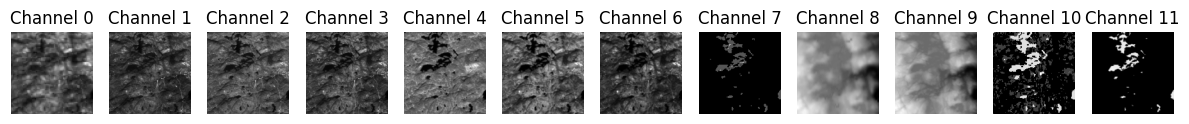

In [ ]:
def visualize_image(image, title="Image"):
    """
    Visualizes a single image or a batch of images.
    Args:
        image (numpy array): The image or batch of images to visualize.
        title (str): The title of the plot.
    """
    if len(image.shape) == 4:  # batch, channels, height, width
        # Show the first image in the batch
        image = image[0]

    if len(image.shape) == 3:  # channels, height, width
        # Plot each channel separately
        fig, axes = plt.subplots(1, image.shape[0], figsize=(15, 5))
        for i, ax in enumerate(axes):
            ax.imshow(image[i], cmap='gray')
            ax.set_title(f'Channel {i}')
            ax.axis('off')
    elif len(image.shape) == 2:  # height, width
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        raise ValueError("Unsupported image shape")

    plt.show()

# Example usage
visualize_image(images[0])  # Visualize the first image in the training set

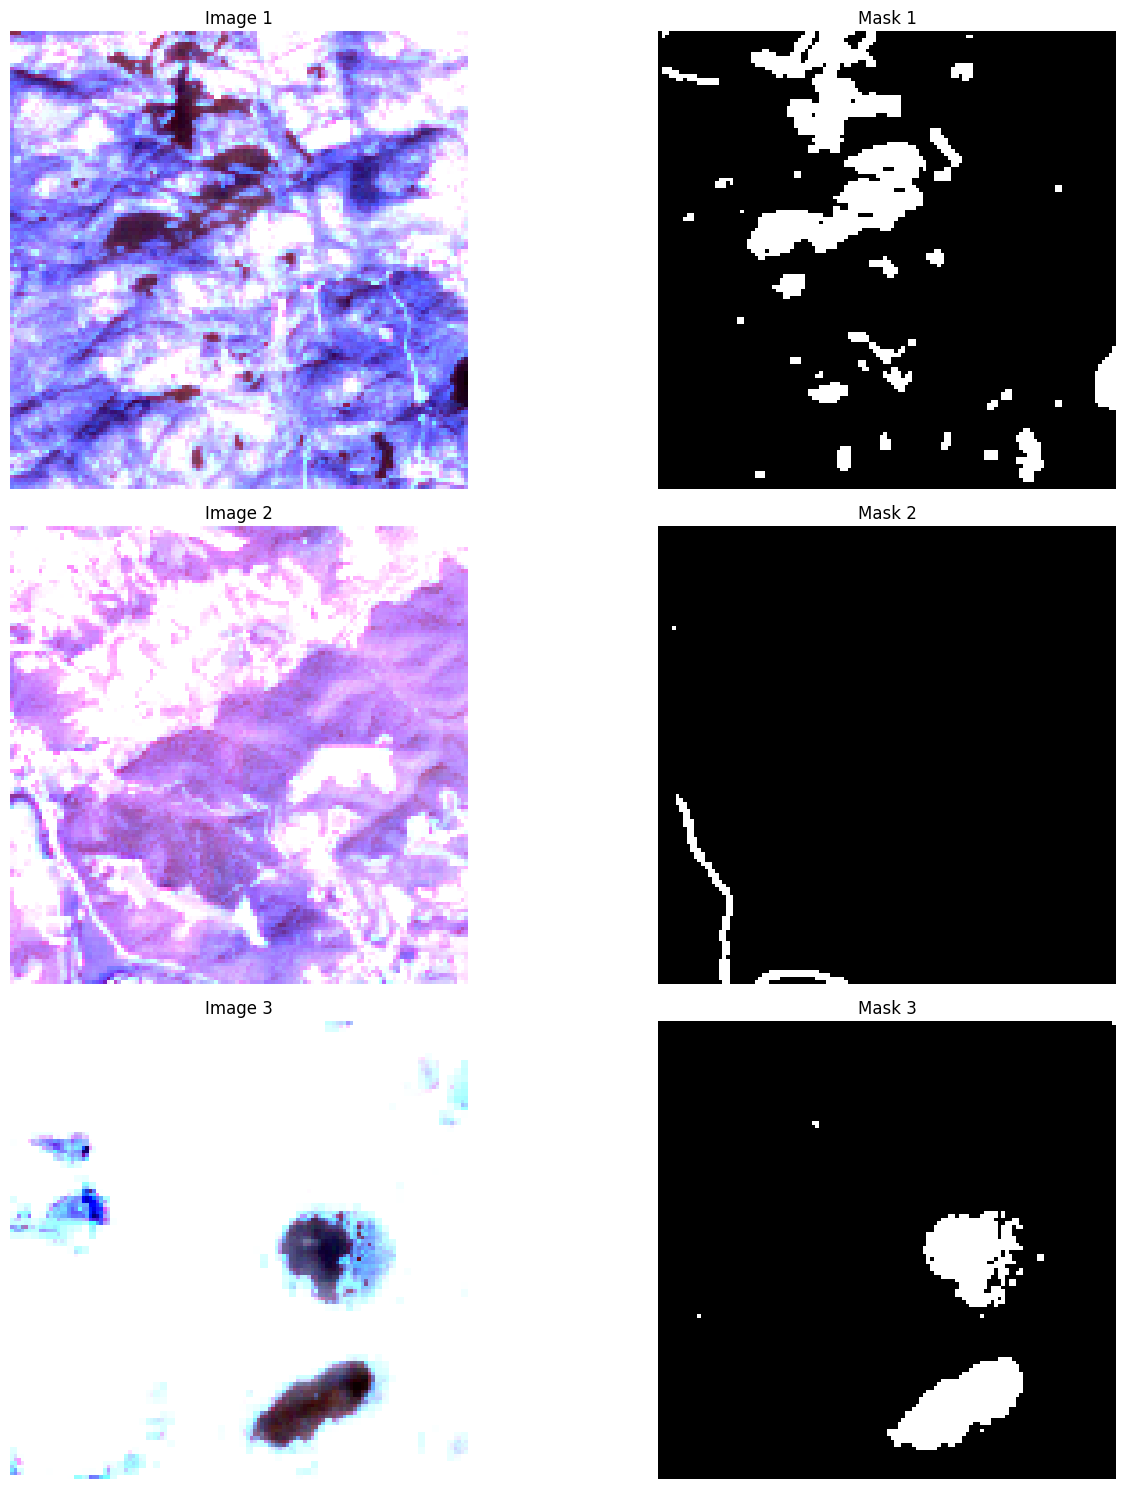

In [ ]:
def visualize_images(images, masks, num_samples=3):
    plt.figure(figsize=(15, 5 * num_samples))
    for i in range(num_samples):
        # Extract RGB channels for visualization (assuming first 3 channels are RGB)
        rgb_image = np.transpose(images[i], (1, 2, 0))  # (height, width, channels)
        if rgb_image.shape[-1] >= 3:
            rgb_image = rgb_image[:, :, :3]  # Use only the first 3 channels

        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.title(f'Image {i+1}')
        plt.imshow(rgb_image)
        plt.axis('off')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.title(f'Mask {i+1}')
        plt.imshow(masks[i], cmap='gray')  # Mask is single channel
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some images and masks
visualize_images(images, masks)

In [ ]:
def normalize_image(image):
    norm_img = np.zeros_like(image, dtype=np.float32)
    for b in range(image.shape[2]):
        band = image[:, :, b]
        min_val = np.min(band)
        max_val = np.max(band)
        if max_val != min_val:
            norm_img[:, :, b] = (band - min_val) / (max_val - min_val)
        else:
            norm_img[:, :, b] = 0  # or any constant value
    return norm_img

images_normalized = np.array([normalize_image(img) for img in images])


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(images_normalized, masks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

In [ ]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Type of y_train: {type(y_train)}")


Shape of y_train: (170, 128, 128)
Type of y_train: <class 'numpy.ndarray'>


In [ ]:
def preprocess_images(images):
    return np.transpose(images, (0, 2, 3, 1))  # (batch_size, height, width, channels)

def preprocess_labels(labels):
    return np.expand_dims(labels, axis=-1)  # (batch_size, height, width, 1)

X_train = preprocess_images(X_train)
y_train = preprocess_labels(y_train)
X_val = preprocess_images(X_val)
y_val = preprocess_labels(y_val)
X_test = preprocess_images(X_test)
y_test = preprocess_labels(y_test)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train shape:", X_val.shape)
print("y_train shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (170, 128, 128, 12)
y_train shape: (170, 128, 128, 1)
X_train shape: (74, 128, 128, 12)
y_train shape: (74, 128, 128, 1)
X_test shape: (62, 128, 128, 12)
y_test shape: (62, 128, 128, 1)


In [ ]:
import numpy as np
import tensorflow as tf
import keras_cv
from sklearn.model_selection import train_test_split
import rasterio
import os


# Convert to TensorFlow datasets
def tf_dataset(images, labels, batch_size=4):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = tf_dataset(X_train, y_train)
val_ds = tf_dataset(X_val, y_val)
test_ds = tf_dataset(X_test, y_test)


In [ ]:
import tensorflow as tf

def dice_loss(y_true, y_pred, smooth=1e-6):
    # Flatten the tensors
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    dice_coeff = (2. * intersection + smooth) / (union + smooth)

    return 1 - dice_coeff


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import keras_cv
import keras

def create_custom_deeplabv3plus(input_shape, num_classes, spatial_dropout_rate=0.3, l2_lambda=0.01):
    inputs = layers.Input(shape=input_shape)

    # Custom Conv2D to handle 12-channel input and match expected 3-channel format with L2 regularization
    x = layers.Conv2D(
        64,
        (3, 3),
        padding='same',
        activation='relu',
        kernel_regularizer=regularizers.l2(l2_lambda)
    )(inputs)

    # Add Spatial Dropout Layer
    x = layers.SpatialDropout2D(rate=spatial_dropout_rate)(x)

    # Load the pre-trained DeepLabV3Plus model (resnet50_v2) with 3 input channels
    base_model = keras_cv.models.DeepLabV3Plus.from_preset("deeplab_v3_plus_resnet50_pascalvoc", num_classes=num_classes)

    # Extract the backbone
    backbone = base_model.backbone

    # Adapt the pre-trained model for 12-channel input with L2 regularization
    x = layers.Conv2D(
        3,
        (1, 1),
        kernel_regularizer=regularizers.l2(l2_lambda)
    )(x)  # Reduce channels to 3
    x = backbone(x, training=False)  # Process through the backbone

    # Custom upsampling and output layers with L2 regularization
    x = layers.Conv2D(
        num_classes,
        (1, 1),
        activation='sigmoid',
        kernel_regularizer=regularizers.l2(l2_lambda)
    )(x)  # Use sigmoid for binary classification
    x = layers.UpSampling2D(size=(input_shape[0] // x.shape[1], input_shape[1] // x.shape[2]))(x)

    model = models.Model(inputs, x)
    return model


In [ ]:
# Define input shape and parameters
input_shape = (128, 128, 12)  # Custom input shape with 12 channels
num_classes = 1  # For binary classification
BATCH_SIZE = 32
EPOCHS = 70
INITIAL_LR = 0.01 * BATCH_SIZE / 16
learning_rate = tf.keras.optimizers.schedules.CosineDecay(
   INITIAL_LR,
   decay_steps=EPOCHS * 2124,
)


# Create the model
model = create_custom_deeplabv3plus(input_shape, num_classes)
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 128, 128, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 128, 128, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 3)    │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_v2_backbone_1           │ (None, 4, 4, 2048)     │    23,564,800 │
│ (ResNetV2Backbone)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 1)        │         2,049 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,574,020 (89.93 MB)

 Trainable params: 23,528,580 (89.75 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=learning_rate,
         # Optional: Nest
      ),
        loss=dice_loss,
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
        ],
    )

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('deeplabv3plus_weights.weights.h5', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 693ms/step - accuracy: 0.6064 - loss: 1.0138 - val_accuracy: 0.6337 - val_loss: 0.9111 - learning_rate: 0.0010
Epoch 2/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6863 - loss: 0.8608 - val_accuracy: 0.7362 - val_loss: 0.7964 - learning_rate: 0.0010
Epoch 3/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6643 - loss: 0.8516 - val_accuracy: 0.7362 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 4/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6745 - loss: 0.8038 - val_accuracy: 0.7362 - val_loss: 0.7513 - learning_rate: 0.0010
Epoch 5/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6637 - loss: 0.7842 - val_accuracy: 0.7185 - val_loss: 0.8219 - learning_rate: 0.0010
Epoch 6/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6902 - loss: 0.7233 - val_accuracy: 0.7362 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 7/70
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7059 - loss: 0.7025 - val_a

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6475 - loss: 0.7640
Test Loss: 0.7907321453094482, Test Accuracy: 0.6234357357025146


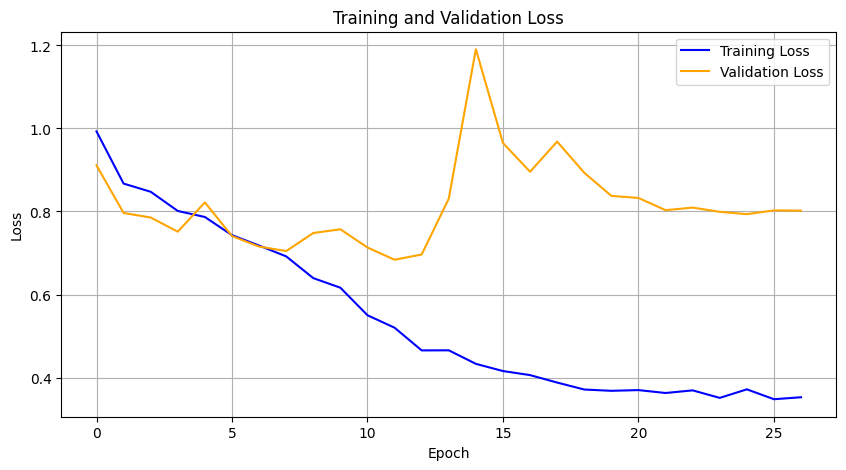

In [ ]:
def plot_training_history(history):
    # Get training and validation loss from the history object
    train_loss = history.history['loss']
    val_loss = history.history.get('val_loss')  # Might be None if validation data was not provided

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss', color='blue')

    if val_loss is not None:
        plt.plot(val_loss, label='Validation Loss', color='orange')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'history' is the result from model.fit()
plot_training_history(history)


In [ ]:
# Make predictions on the test data
y_pred = model.predict(test_ds)

# If the model outputs probabilities, convert them to class labels
y_pred_binary = (y_pred > 0.5).astype(np.uint8)  # For multi-class, use argmax; for binary, use a threshold

# Flatten arrays for evaluation
y_test_flat = y_test.flatten()
y_pred_labels_flat = y_pred_binary.flatten()

# Calculate metrics
f1 = f1_score(y_test_flat, y_pred_labels_flat, average='weighted')
precision = precision_score(y_test_flat, y_pred_labels_flat, average='weighted')
recall = recall_score(y_test_flat, y_pred_labels_flat, average='weighted')
accuracy = accuracy_score(y_test_flat, y_pred_labels_flat)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step
F1 Score: 0.49586944873651195
Precision: 0.5312430640507202
Recall: 0.6216952416204637
Accuracy: 0.6216952416204637
